In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('Classification/all_files_ZAv1.csv')

In [3]:
# data.columns

In [4]:
# Extract relevant columns
artists = data['artist_names']
tracks = data['track_name']
weights = data['artistAppearanceCount']  # Assuming this column contains the weights

In [5]:
def getprolificartists(df,appearancetimes):
    df = df[df["artistAppearanceCount"] > appearancetimes]
    prolific_artists = df["main_artist"].unique().tolist()
    
    return prolific_artists

In [7]:
theprolificones = getprolificartists(data,200)

In [9]:
len(theprolificones)

64

In [10]:
# Filter rows based on column values in the list
data = data[data['main_artist'].isin(theprolificones)]  # Replace 'column_name' with the actual column name

In [11]:
data.shape

(27216, 23)

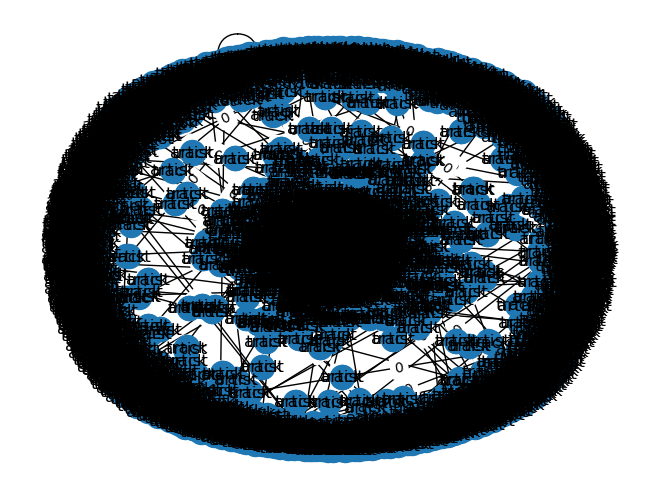

In [12]:
# Create a graph object
G = nx.Graph()

# Add nodes for artists and tracks
G.add_nodes_from(artists, label='artist')
G.add_nodes_from(tracks, label='track')

# Add edges with weightings
for i in range(len(data)):
    artist = artists[i]
    track = tracks[i]
    weight = weights[i]
    G.add_edge(artist, track, weight=weight)

# Visualize the network diagram
pos = nx.spring_layout(G)
labels = nx.get_node_attributes(G, 'label')
weights = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, labels=labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.show()

In [13]:
# Create a graph object
G = nx.Graph()

# Add nodes for artists and tracks
G.add_nodes_from(artists, label='artist')
G.add_nodes_from(tracks, label='track')

# Add edges with weightings
for i in range(len(data)):
    artist = artists[i]
    track = tracks[i]
    weight = weights[i]
    G.add_edge(artist, artist, weight=weight)
    G.add_edge(artist, track, weight=weight)

# Visualize the network diagram
pos = nx.spring_layout(G)
labels = nx.get_node_attributes(G, 'label')
weights = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, labels=labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.show()

KeyError: 0